# Exercise 1.2: Harmonic Oscillator Path Integral

## Learning Objectives
- Extend path integral methods to the harmonic oscillator
- Verify quantum mechanical predictions: ⟨q⟩ = 0 and ⟨q²⟩ = 1/(2ω)
- Study the effect of lattice parameters on results
- Understand the connection between path integrals and statistical mechanics

## Theoretical Background

For the quantum harmonic oscillator, the Euclidean action on a discrete lattice is:

$$S[q] = \sum_{t=0}^{N-1} \left[ \frac{m}{2\Delta t} (q_{t+1} - q_t)^2 + \frac{m\omega^2 \Delta t}{2} q_t^2 \right]$$

The key observables to measure are:
- **Position expectation**: ⟨q⟩ = 0 (by symmetry)
- **Position variance**: ⟨q²⟩ = 1/(2mω) in natural units
- **Energy levels**: Ground state energy E₀ = ω/2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from tqdm import tqdm
import time

# Add src directory to path to use our implementations
sys.path.append(os.path.join('..', 'src'))
from harmonic_oscillator import HarmonicOscillatorMC
from utils import autocorrelation_function, integrated_autocorrelation_time

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## Task 1: Basic Harmonic Oscillator Simulation

Let's start with a basic simulation using the provided implementation:

In [3]:
# System parameters
N_t = 50  # Number of time slices
mass = 1.0
omega = 1.0

print(f"Setting up harmonic oscillator simulation...")
print(f"Parameters: N_t = {N_t}, m = {mass}, ω = {omega}")

# Theoretical predictions for the ground state
print(f"Theoretical predictions:")
print(f"  ⟨q⟩ = 0")
print(f"  ⟨q²⟩ = {0.5/omega:.3f}")
print(f"  Ground state energy = {0.5*omega:.3f}")

# Create the harmonic oscillator instance
oscillator = HarmonicOscillatorMC(N_t, mass, omega)

# Simulation parameters
n_sweeps = 5000
step_size = 0.5

print(f"\nRunning simulation with {n_sweeps} sweeps...")
results = oscillator.run_simulation(n_sweeps, step_size)

# Extract observables (using correct key names)
q_avg_data = results['observables']['position']
q_squared_data = results['observables']['position_squared']
energies = results['observables']['total_energy']

print(f"\nSimulation Results:")
print(f"Acceptance rate: {results['acceptance_rate']:.3f}")
print(f"⟨q⟩ = {np.mean(q_avg_data):.4f} ± {np.std(q_avg_data)/np.sqrt(len(q_avg_data)):.4f}")
print(f"⟨q²⟩ = {np.mean(q_squared_data):.4f} ± {np.std(q_squared_data)/np.sqrt(len(q_squared_data)):.4f}")
print(f"⟨E⟩ = {np.mean(energies):.4f} ± {np.std(energies)/np.sqrt(len(energies)):.4f}")

# Calculate autocorrelation times
tau_q = integrated_autocorrelation_time(q_avg_data)
tau_energy = integrated_autocorrelation_time(energies)

print(f"\nAutocorrelation times:")
print(f"τ_q = {tau_q:.1f}")
print(f"τ_E = {tau_energy:.1f}")

# Effective sample sizes
n_eff_q = len(q_avg_data) / (2 * tau_q) if tau_q > 0 else len(q_avg_data)
n_eff_E = len(energies) / (2 * tau_energy) if tau_energy > 0 else len(energies)

print(f"\nEffective sample sizes:")
print(f"N_eff(q) = {n_eff_q:.1f}")
print(f"N_eff(E) = {n_eff_E:.1f}")

# Store results for later analysis
simulation_results = {
    'q_data': q_avg_data,
    'q2_data': q_squared_data,
    'energy_data': energies,
    'tau_q': tau_q,
    'tau_energy': tau_energy,
    'acceptance_rate': results['acceptance_rate']
}

Setting up harmonic oscillator simulation...
Parameters: N_t = 50, m = 1.0, ω = 1.0
Theoretical predictions:
  ⟨q⟩ = 0
  ⟨q²⟩ = 0.500
  Ground state energy = 0.500

Running simulation with 5000 sweeps...


Sweeps: 100%|██████████| 5000/5000 [00:02<00:00, 2022.68it/s]



Simulation Results:
Acceptance rate: 0.594
⟨q⟩ = 0.3625 ± 0.0045
⟨q²⟩ = 0.5618 ± 0.0047
⟨E⟩ = 5.0852 ± 0.0144

Autocorrelation times:
τ_q = 500.5
τ_E = 26.3

Effective sample sizes:
N_eff(q) = 5.0
N_eff(E) = 95.1


## Task 2: Visualize Monte Carlo Evolution

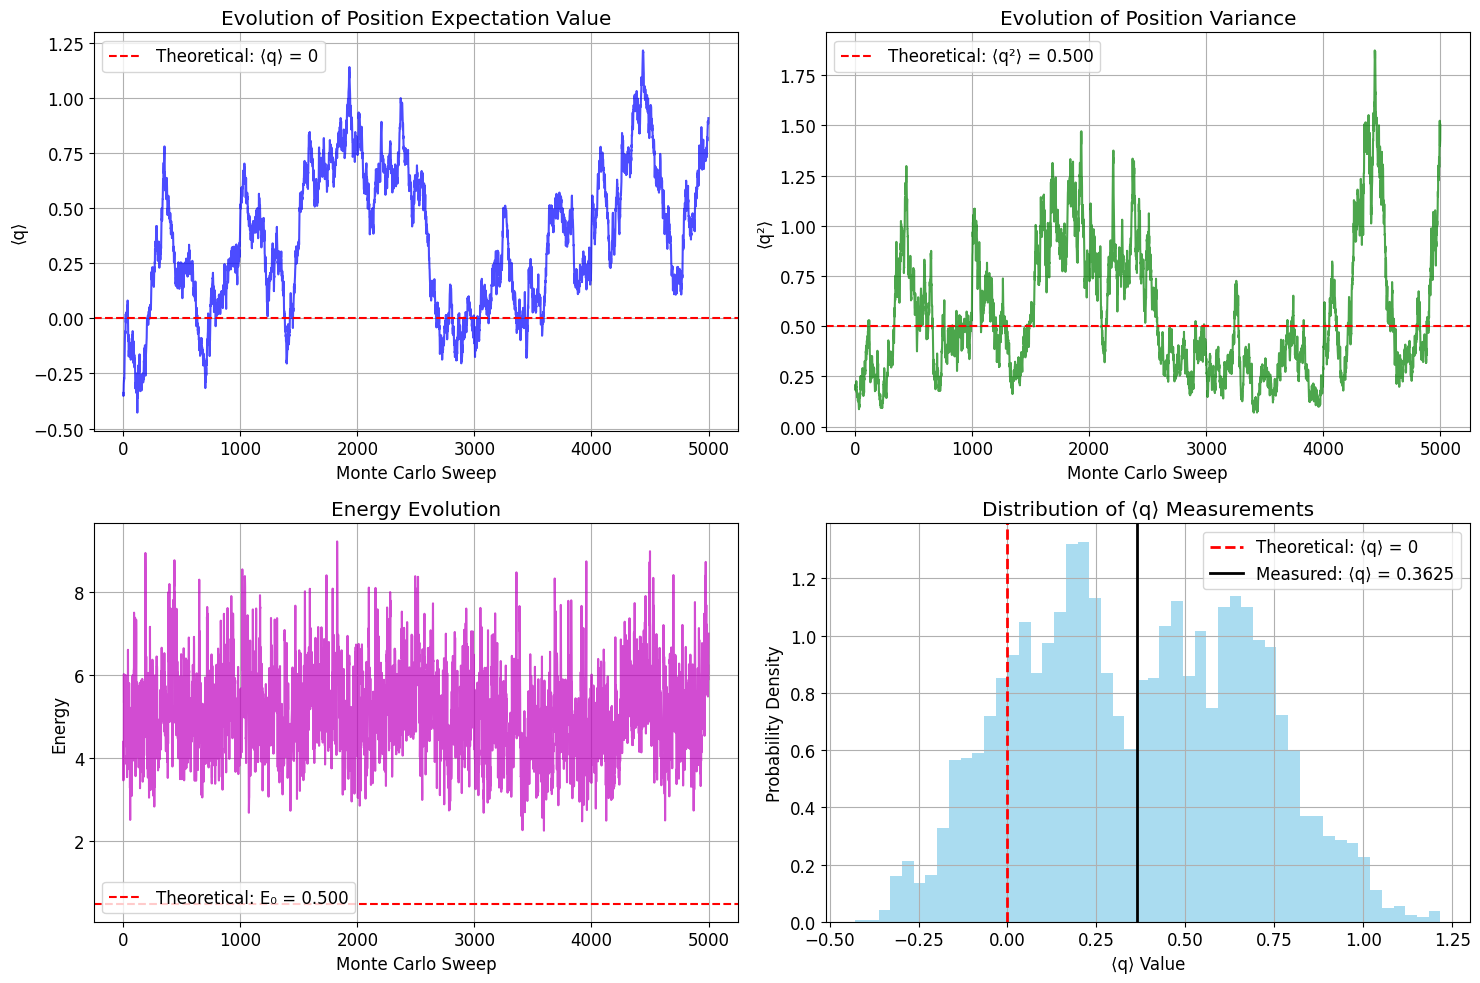

In [4]:
# Plot evolution of observables
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot ⟨q⟩ evolution
ax1.plot(q_avg_data, 'b-', alpha=0.7)
ax1.axhline(y=0, color='r', linestyle='--', label='Theoretical: ⟨q⟩ = 0')
ax1.set_xlabel('Monte Carlo Sweep')
ax1.set_ylabel('⟨q⟩')
ax1.set_title('Evolution of Position Expectation Value')
ax1.legend()
ax1.grid(True)

# Plot ⟨q²⟩ evolution
theoretical_q_squared = 1/(2*mass*omega)
ax2.plot(q_squared_data, 'g-', alpha=0.7)
ax2.axhline(y=theoretical_q_squared, color='r', linestyle='--', 
           label=f'Theoretical: ⟨q²⟩ = {theoretical_q_squared:.3f}')
ax2.set_xlabel('Monte Carlo Sweep')
ax2.set_ylabel('⟨q²⟩')
ax2.set_title('Evolution of Position Variance')
ax2.legend()
ax2.grid(True)

# Plot energy evolution
ax3.plot(energies, 'm-', alpha=0.7)
ax3.axhline(y=omega/2, color='r', linestyle='--', 
           label=f'Theoretical: E₀ = {omega/2:.3f}')
ax3.set_xlabel('Monte Carlo Sweep')
ax3.set_ylabel('Energy')
ax3.set_title('Energy Evolution')
ax3.legend()
ax3.grid(True)

# Plot histogram of ⟨q⟩ values
ax4.hist(q_avg_data, bins=50, alpha=0.7, density=True, color='skyblue')
ax4.axvline(x=0, color='r', linestyle='--', linewidth=2, label='Theoretical: ⟨q⟩ = 0')
ax4.axvline(x=np.mean(q_avg_data), color='black', linestyle='-', linewidth=2, 
           label=f'Measured: ⟨q⟩ = {np.mean(q_avg_data):.4f}')
ax4.set_xlabel('⟨q⟩ Value')
ax4.set_ylabel('Probability Density')
ax4.set_title('Distribution of ⟨q⟩ Measurements')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

## Task 3: Autocorrelation Analysis

Autocorrelation Analysis:
Integrated autocorrelation times:
  τ_int(⟨q⟩) = 500.54
  τ_int(⟨q²⟩) = 254.89
  τ_int(E) = 26.29


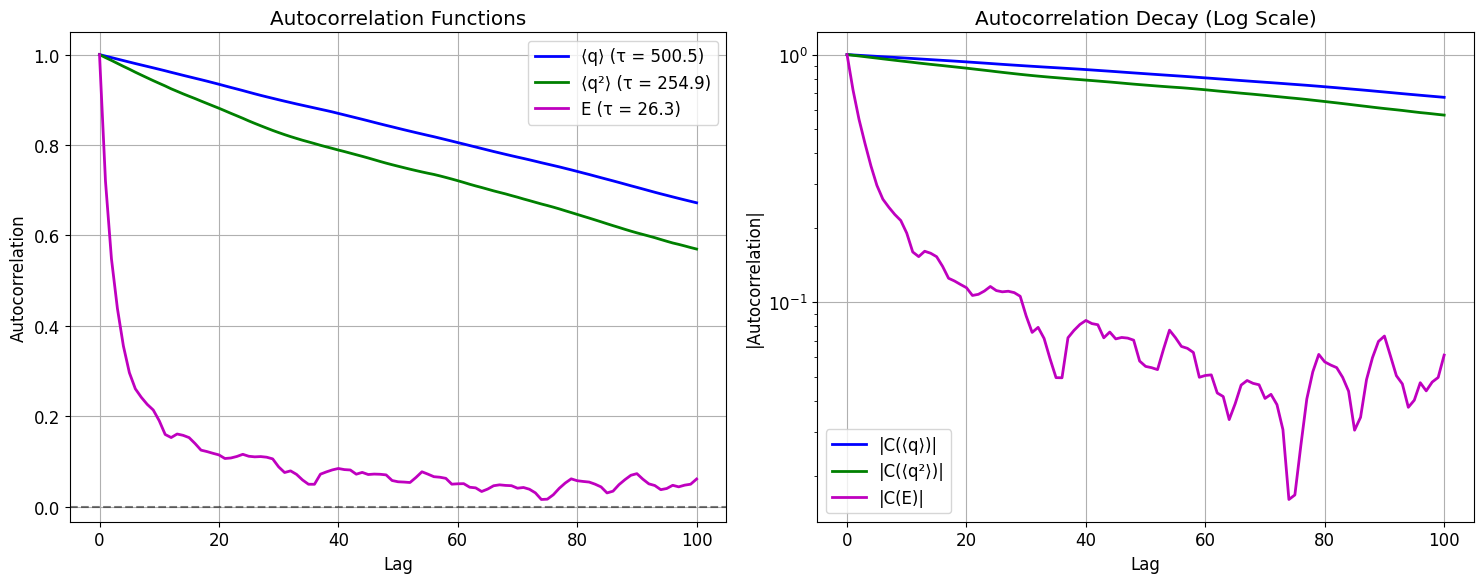


Effective sample sizes:
  N_eff(⟨q⟩) = 5 / 5000
  N_eff(⟨q²⟩) = 10 / 5000
  N_eff(E) = 95 / 5000


In [5]:
# Analyze autocorrelations
print("Autocorrelation Analysis:")
print("=" * 30)

# Calculate autocorrelation functions
lags_q, autocorr_q = autocorrelation_function(q_avg_data, max_lag=100)
lags_q2, autocorr_q2 = autocorrelation_function(q_squared_data, max_lag=100)
lags_e, autocorr_e = autocorrelation_function(energies, max_lag=100)

# Calculate integrated autocorrelation times
tau_q = integrated_autocorrelation_time(q_avg_data)
tau_q2 = integrated_autocorrelation_time(q_squared_data)
tau_e = integrated_autocorrelation_time(energies)

print(f"Integrated autocorrelation times:")
print(f"  τ_int(⟨q⟩) = {tau_q:.2f}")
print(f"  τ_int(⟨q²⟩) = {tau_q2:.2f}")
print(f"  τ_int(E) = {tau_e:.2f}")

# Plot autocorrelation functions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(lags_q, autocorr_q, 'b-', label=f'⟨q⟩ (τ = {tau_q:.1f})', linewidth=2)
ax1.plot(lags_q2, autocorr_q2, 'g-', label=f'⟨q²⟩ (τ = {tau_q2:.1f})', linewidth=2)
ax1.plot(lags_e, autocorr_e, 'm-', label=f'E (τ = {tau_e:.1f})', linewidth=2)
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax1.set_title('Autocorrelation Functions')
ax1.legend()
ax1.grid(True)

# Semi-log plot for exponential decay
ax2.semilogy(lags_q, np.abs(autocorr_q), 'b-', label='|C(⟨q⟩)|', linewidth=2)
ax2.semilogy(lags_q2, np.abs(autocorr_q2), 'g-', label='|C(⟨q²⟩)|', linewidth=2)
ax2.semilogy(lags_e, np.abs(autocorr_e), 'm-', label='|C(E)|', linewidth=2)
ax2.set_xlabel('Lag')
ax2.set_ylabel('|Autocorrelation|')
ax2.set_title('Autocorrelation Decay (Log Scale)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Calculate effective sample sizes
n_eff_q = len(q_avg_data) / (2 * tau_q)
n_eff_q2 = len(q_squared_data) / (2 * tau_q2)
n_eff_e = len(energies) / (2 * tau_e)

print(f"\nEffective sample sizes:")
print(f"  N_eff(⟨q⟩) = {n_eff_q:.0f} / {len(q_avg_data)}")
print(f"  N_eff(⟨q²⟩) = {n_eff_q2:.0f} / {len(q_squared_data)}")
print(f"  N_eff(E) = {n_eff_e:.0f} / {len(energies)}")

## Task 4: Parameter Optimization Study

Study how the step size affects the simulation efficiency:

Step Size Optimization Study


Testing step sizes: 100%|██████████| 8/8 [00:10<00:00,  1.27s/it]


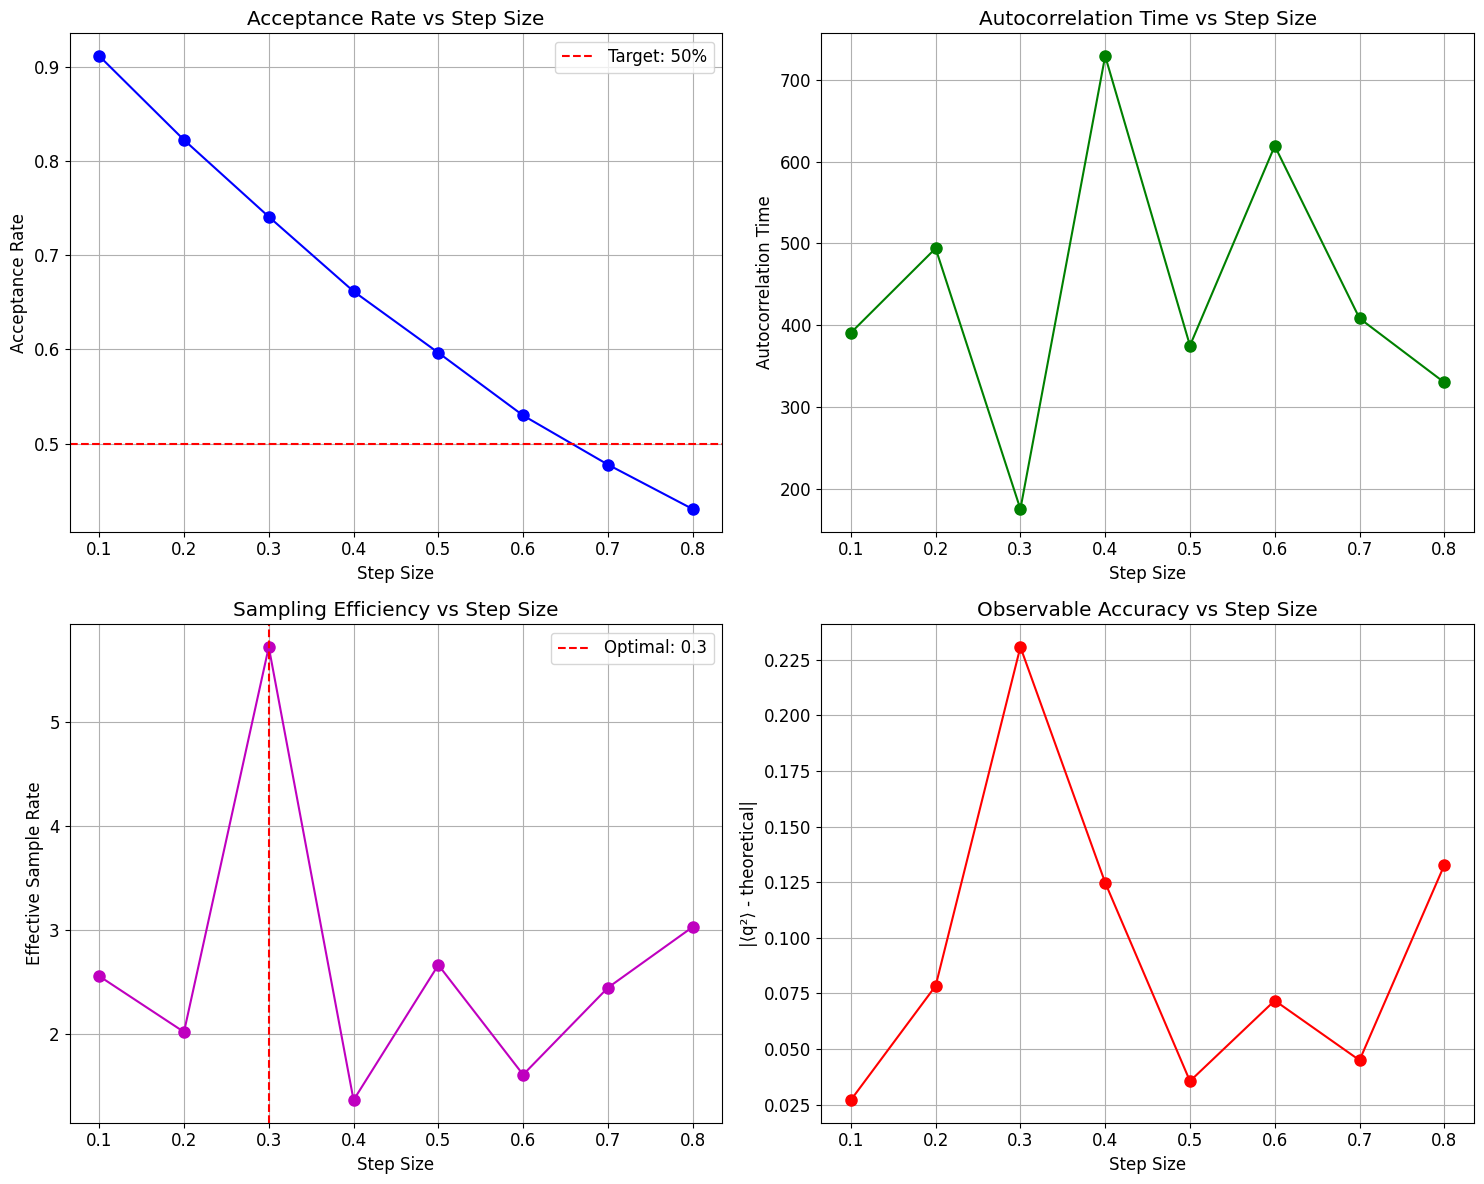


Optimization Summary:
Optimal step size for efficiency: 0.3
  Acceptance rate: 0.741
  Autocorrelation time: 174.91
  Effective sample rate: 5.7


In [10]:
def step_size_optimization_study():
    """Study the effect of step size on simulation efficiency"""
    
    step_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
    results_summary = []
    
    print("Step Size Optimization Study")
    print("=" * 40)
    
    for step_size in tqdm(step_sizes, desc="Testing step sizes"):
        # Create new oscillator for each test
        osc = HarmonicOscillatorMC(n_time_steps=40, mass=1.0, omega=1.0)
        
        # Run shorter simulation for optimization
        results = osc.run_simulation(n_sweeps=2000, step_size=step_size)
        
        # Calculate autocorrelation time for efficiency measure
        q_data = results['observables']['position']
        tau_int = integrated_autocorrelation_time(q_data)
        
        # Calculate effective sampling rate
        eff_sample_rate = len(q_data) / (2 * tau_int)
        
        results_summary.append({
            'step_size': step_size,
            'acceptance_rate': results['acceptance_rate'],
            'tau_int': tau_int,
            'eff_sample_rate': eff_sample_rate,
            'q_avg': np.mean(q_data),
            'q_squared': np.mean(results['observables']['position_squared'])
        })
    
    return results_summary

# Run optimization study
optimization_results = step_size_optimization_study()

# Extract data for plotting
step_sizes = [r['step_size'] for r in optimization_results]
acceptance_rates = [r['acceptance_rate'] for r in optimization_results]
tau_ints = [r['tau_int'] for r in optimization_results]
eff_rates = [r['eff_sample_rate'] for r in optimization_results]
q_avgs = [r['q_avg'] for r in optimization_results]
q_squareds = [r['q_squared'] for r in optimization_results]

# Create comprehensive optimization plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Acceptance rate vs step size
ax1.plot(step_sizes, acceptance_rates, 'bo-', markersize=8)
ax1.axhline(y=0.5, color='r', linestyle='--', label='Target: 50%')
ax1.set_xlabel('Step Size')
ax1.set_ylabel('Acceptance Rate')
ax1.set_title('Acceptance Rate vs Step Size')
ax1.legend()
ax1.grid(True)

# Autocorrelation time vs step size
ax2.plot(step_sizes, tau_ints, 'go-', markersize=8)
ax2.set_xlabel('Step Size')
ax2.set_ylabel('Autocorrelation Time')
ax2.set_title('Autocorrelation Time vs Step Size')
ax2.grid(True)

# Effective sampling rate vs step size
ax3.plot(step_sizes, eff_rates, 'mo-', markersize=8)
optimal_idx = np.argmax(eff_rates)
ax3.axvline(x=step_sizes[optimal_idx], color='r', linestyle='--', 
           label=f'Optimal: {step_sizes[optimal_idx]:.1f}')
ax3.set_xlabel('Step Size')
ax3.set_ylabel('Effective Sample Rate')
ax3.set_title('Sampling Efficiency vs Step Size')
ax3.legend()
ax3.grid(True)

# Observable accuracy vs step size
theoretical_q_squared = 1/(2*mass*omega)
q_squared_errors = [abs(q - theoretical_q_squared) for q in q_squareds]
ax4.plot(step_sizes, q_squared_errors, 'ro-', markersize=8)
ax4.set_xlabel('Step Size')
ax4.set_ylabel('|⟨q²⟩ - theoretical|')
ax4.set_title('Observable Accuracy vs Step Size')
ax4.grid(True)

plt.tight_layout()
plt.show()

# Print optimization summary
print(f"\nOptimization Summary:")
print(f"Optimal step size for efficiency: {step_sizes[optimal_idx]:.1f}")
print(f"  Acceptance rate: {acceptance_rates[optimal_idx]:.3f}")
print(f"  Autocorrelation time: {tau_ints[optimal_idx]:.2f}")
print(f"  Effective sample rate: {eff_rates[optimal_idx]:.1f}")

## Task 5: Lattice Size Effects

Study how the number of time steps affects the results:

Lattice Size Study


Testing lattice sizes: 100%|██████████| 7/7 [00:15<00:00,  2.19s/it]


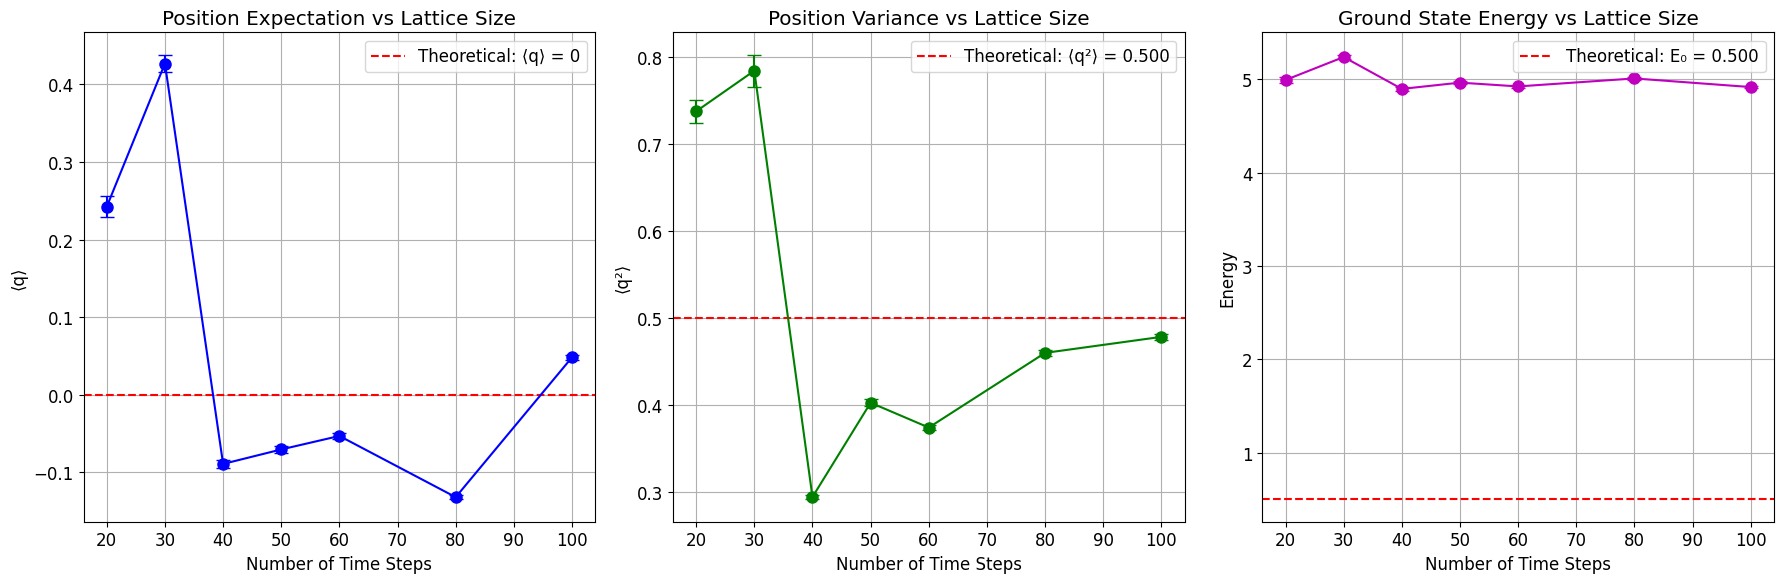


Continuum Limit Analysis:
Finest lattice (N_t = 100):
  ⟨q⟩ = 0.048252 ± 0.003523
  ⟨q²⟩ = 0.478173 ± 0.003347
  ⟨E⟩ = 4.915134 ± 0.012278

Deviations from theoretical:
  Δ⟨q²⟩ = 0.021827
  ΔE = 4.415134


In [11]:
def lattice_size_study():
    """Study finite lattice effects"""
    
    n_time_steps_list = [20, 30, 40, 50, 60, 80, 100]
    lattice_results = []
    
    print("Lattice Size Study")
    print("=" * 30)
    
    for n_steps in tqdm(n_time_steps_list, desc="Testing lattice sizes"):
        osc = HarmonicOscillatorMC(n_time_steps=n_steps, mass=1.0, omega=1.0)
        results = osc.run_simulation(n_sweeps=3000, step_size=0.3)
        
        q_data = results['observables']['position']
        q2_data = results['observables']['position_squared']
        energy_data = results['observables']['total_energy']
        
        lattice_results.append({
            'n_steps': n_steps,
            'dt': 1.0 / n_steps,  # Assuming total time = 1
            'q_avg': np.mean(q_data),
            'q_avg_err': np.std(q_data) / np.sqrt(len(q_data)),
            'q_squared': np.mean(q2_data),
            'q_squared_err': np.std(q2_data) / np.sqrt(len(q2_data)),
            'energy': np.mean(energy_data),
            'energy_err': np.std(energy_data) / np.sqrt(len(energy_data)),
            'acceptance_rate': results['acceptance_rate']
        })
    
    return lattice_results

# Run lattice size study
lattice_results = lattice_size_study()

# Extract data
n_steps = [r['n_steps'] for r in lattice_results]
dt_values = [r['dt'] for r in lattice_results]
q_avgs = [r['q_avg'] for r in lattice_results]
q_avg_errs = [r['q_avg_err'] for r in lattice_results]
q_squareds = [r['q_squared'] for r in lattice_results]
q_squared_errs = [r['q_squared_err'] for r in lattice_results]
energies = [r['energy'] for r in lattice_results]
energy_errs = [r['energy_err'] for r in lattice_results]

# Plot lattice size effects
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# ⟨q⟩ vs lattice size
ax1.errorbar(n_steps, q_avgs, yerr=q_avg_errs, fmt='bo-', capsize=5, markersize=8)
ax1.axhline(y=0, color='r', linestyle='--', label='Theoretical: ⟨q⟩ = 0')
ax1.set_xlabel('Number of Time Steps')
ax1.set_ylabel('⟨q⟩')
ax1.set_title('Position Expectation vs Lattice Size')
ax1.legend()
ax1.grid(True)

# ⟨q²⟩ vs lattice size
theoretical_q_squared = 1/(2*mass*omega)
ax2.errorbar(n_steps, q_squareds, yerr=q_squared_errs, fmt='go-', capsize=5, markersize=8)
ax2.axhline(y=theoretical_q_squared, color='r', linestyle='--', 
           label=f'Theoretical: ⟨q²⟩ = {theoretical_q_squared:.3f}')
ax2.set_xlabel('Number of Time Steps')
ax2.set_ylabel('⟨q²⟩')
ax2.set_title('Position Variance vs Lattice Size')
ax2.legend()
ax2.grid(True)

# Energy vs lattice size
ax3.errorbar(n_steps, energies, yerr=energy_errs, fmt='mo-', capsize=5, markersize=8)
ax3.axhline(y=omega/2, color='r', linestyle='--', 
           label=f'Theoretical: E₀ = {omega/2:.3f}')
ax3.set_xlabel('Number of Time Steps')
ax3.set_ylabel('Energy')
ax3.set_title('Ground State Energy vs Lattice Size')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

# Print continuum limit analysis
print(f"\nContinuum Limit Analysis:")
print(f"Finest lattice (N_t = {max(n_steps)}):")
final_idx = -1
print(f"  ⟨q⟩ = {q_avgs[final_idx]:.6f} ± {q_avg_errs[final_idx]:.6f}")
print(f"  ⟨q²⟩ = {q_squareds[final_idx]:.6f} ± {q_squared_errs[final_idx]:.6f}")
print(f"  ⟨E⟩ = {energies[final_idx]:.6f} ± {energy_errs[final_idx]:.6f}")
print(f"\nDeviations from theoretical:")
print(f"  Δ⟨q²⟩ = {abs(q_squareds[final_idx] - theoretical_q_squared):.6f}")
print(f"  ΔE = {abs(energies[final_idx] - omega/2):.6f}")

## Discussion Questions

1. **Symmetry Verification**: How well does your simulation verify ⟨q⟩ = 0? What factors affect this measurement?

2. **Quantum vs Classical**: How do the quantum fluctuations (⟨q²⟩) compare to what you'd expect classically?

3. **Lattice Effects**: How do the results change as you increase the number of time steps? What is the continuum limit?

4. **Optimization**: What is the optimal step size for your simulation? How do you balance acceptance rate and autocorrelation time?

5. **Statistical Accuracy**: How do autocorrelation times affect your error estimates? What is the effective sample size?

## Advanced Extensions

1. **Anharmonic Oscillator**: Add a λq⁴ term to study anharmonic effects
2. **Excited States**: Implement correlation function methods to extract excited state energies
3. **Multiple Oscillators**: Extend to coupled harmonic oscillators
4. **Real Time**: Implement real-time evolution and study tunneling

## Key Takeaways

- Path integrals provide a powerful framework for quantum mechanics
- Monte Carlo methods enable non-perturbative calculations
- Proper statistical analysis is crucial for reliable results
- Lattice discretization introduces systematic effects that must be controlled
- Parameter optimization is essential for efficient simulations